# Individual
## Dataset Overview

The dataset is '2022 MLB Pitcher Statistics'. I obtained this dataset from the website called 'Baseball Reference'. The link to this dataset is https://www.baseball-reference.com/leagues/majors/2022-value-pitching.shtml#players_value_pitching. MLB owns the license of the dataset. We can create different types of visualizations such as histograms, box plots, scatter plots, and line charts with the players' statistics. The dataset has 285 rows and 23 colums. I have removed some rows and colums that have null value for convenience.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('~/Downloads/2022_mlb_pitcher_values.csv')
df

,Rk,Name,Age,Tm,IP,G,GS,R,RA9,RA9opp,...,PPFp,RA9avg,RAA,WAA,gmLI,WAAadj,WAR,RAR,Salary,Name-additional
0,5,Jason Adam,30,TBR,63.1,67,0,12,1.71,4.37,...,93.2,3.86,15,1.7,1.58,0.3,2.7,21,900000,adamja01
1,6,Austin Adams,31,SDP,2.1,2,0,0,0.00,4.51,...,98.0,4.05,1,0.1,0.20,-0.1,0.1,1,925000,adamsau02
2,8,Ehire Adrianza,32,WSN,1.0,1,0,0,0.00,4.84,...,92.0,4.33,0,0.1,0.00,0.0,0.0,1,1500000,adriaeh01
3,10,Hanser Alberto,29,LAD,11.0,10,0,5,4.09,4.53,...,108.3,3.80,0,0.0,0.00,0.0,0.1,1,1350000,alberha01
4,12,Sandy Alcantara,26,MIA,228.2,32,32,67,2.64,4.60,...,98.0,4.61,50,5.9,NaN,-0.2,7.8,71,3800000,alcansa01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,852,Nick Wittgren,31,STL,29.0,29,0,19,5.90,4.28,...,92.5,3.26,-9,-0.9,0.74,0.0,-0.6,-6,1200000,wittgni01
281,853,Alex Wood*,31,SFG,130.2,26,26,78,5.37,4.24,...,100.8,4.82,-8,-0.8,NaN,-0.1,0.3,4,12500000,woodal02
282,855,Brandon Woodruff,29,MIL,153.1,27,27,56,3.29,4.18,...,100.1,4.10,14,1.5,NaN,-0.1,2.8,28,6800000,woodrbr01
283,862,Ryan Yarbrough*,30,TBR,80.0,20,9,44,4.95,4.47,...,95.6,4.19,-6,-0.7,0.72,-0.1,0.0,0,3850000,yarbrry01


In [4]:
df.columns

Index(['Rk', 'Name', 'Age', 'Tm', 'IP', 'G', 'GS', 'R', 'RA9', 'RA9opp',
       'RA9def', 'RA9role', 'RA9extras', 'PPFp', 'RA9avg', 'RAA', 'WAA',
       'gmLI', 'WAAadj', 'WAR', 'RAR', 'Salary', 'Name-additional'],
      dtype='object')

I thought that it would be more interesting if I compare statistics with each player's salary. I wonder if there's correlation between salary and play. I'll focus on the four key stats:

- Wins Above Replacement (WAR)
- Runs Allowed Per Nine Innings Pitched average (RA9avg)
- Runs per 9 Inning of Support from Defense (RA9def)
- Opponents' Runs Scored per 9 Innings (RA9opp)

They are all float values including the salary, but 'Tm' which stands for teams are string values.

### WAR and Salary

In [6]:
salary = df.sort_values(by = ['Salary'], ascending  = False)
salary['Salary']

228    43333333
54     36000000
61     35500000
248    35000000
208    32000000
         ...   
199      100000
104      100000
185      100000
179      100000
66       100000
Name: Salary, Length: 285, dtype: int64

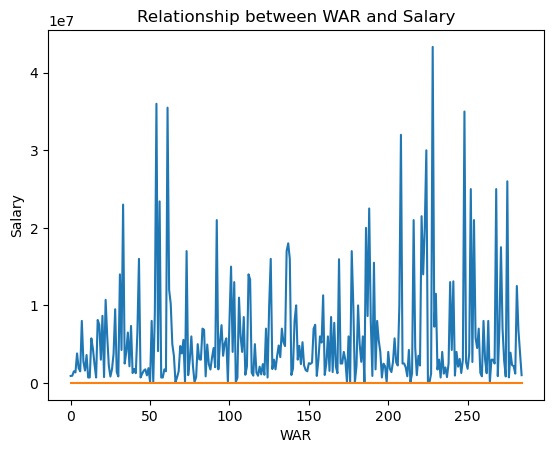

In [7]:
plt.plot(df[['Salary', 'WAR']])
plt.xlabel('WAR')
plt.ylabel('Salary')
plt.title('Relationship between WAR and Salary')
plt.show()

I don't think this visualization tells us something meaningful.

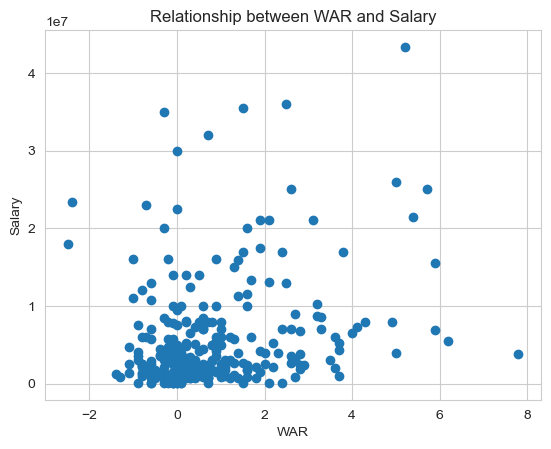

In [19]:
plt.scatter(df['WAR'], df['Salary'])

plt.xlabel('WAR')
plt.ylabel('Salary')
plt.title('Relationship between WAR and Salary')

plt.show()

### RA9avg

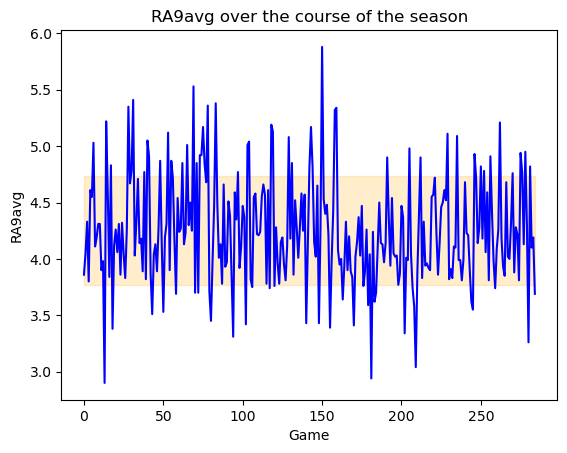

In [11]:
fig, ax = plt.subplots()

ax.plot(df.index, df['RA9avg'], color='blue', label='RA9avg')

# calculate the standard deviation
mean = np.mean(df['RA9avg'])
std = np.std(df['RA9avg'])
upper = mean + std
lower = mean - std
ax.fill_between(df.index, upper, lower, alpha=0.2, color='Orange')

ax.set_xlabel('Game')
ax.set_ylabel('RA9avg')
ax.set_title('RA9avg over the course of the season')

plt.show()

### RA9avg, RA9opp, and RA9def

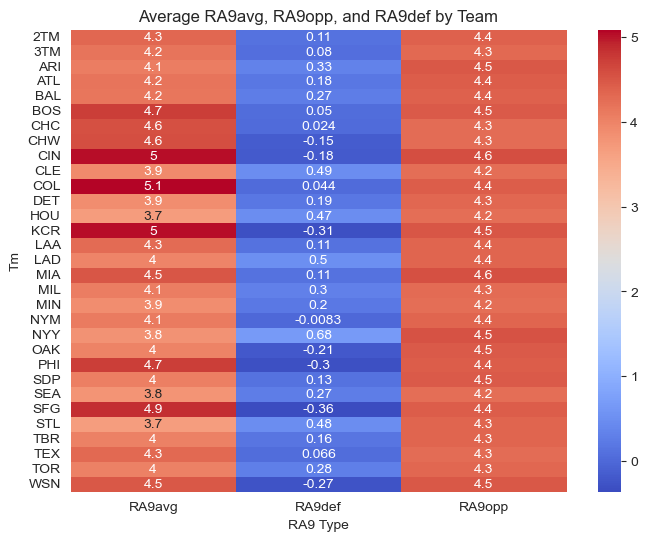

In [18]:
data_by_team = df.groupby('Tm').agg({'RA9avg': 'mean', 'RA9opp': 'mean', 'RA9def': 'mean'}).reset_index()

df2 = pd.melt(data_by_team, id_vars=['Tm'], var_name='RA9 Type', value_name='Average')

sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(df2.pivot('Tm', 'RA9 Type', 'Average'), annot=True, cmap='coolwarm')
heatmap.set_title('Average RA9avg, RA9opp, and RA9def by Team')

plt.show()
